# <span style=color:darkblue>03 projecte datascience-k-means</span>

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from mpl_toolkits.mplot3d import Axes3D

#Normalització
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer

#K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


#PCA
from sklearn.decomposition import PCA

#kneed, to identify the elbow point programmatically
from kneed import KneeLocator

import warnings
warnings.filterwarnings('ignore')

## <span style=color:darkblue>DataFrame tots el moviments finanacers</span>

In [82]:
df = pd.read_csv('.\\datasets_definitius\\df_finance_all.csv')
#df = pd.read_csv('.\\datasets_definitius\\df_finance_top_1000.csv')

In [83]:
df = df.drop(['Unnamed: 0'], axis=1)

In [84]:
df.describe()

,id,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth
count,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000
mean,5375.764343,0.102114,14.786095,1199.910606,1.086859,36.608208,2019.971635,5.018349,15.927163
std,2661.920676,0.045818,59.221373,974.498989,1.394178,305.302862,1.344438,3.116675,8.361574
min,1.000000,0.000200,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000
25%,3126.000000,0.060217,0.600000,273.303000,0.000000,0.000000,2019.000000,2.000000,9.000000
50%,5354.000000,0.104054,6.500000,1225.680000,1.000000,0.822722,2021.000000,4.000000,16.000000
75%,7658.000000,0.119896,21.950000,1854.560000,2.000000,1.957943,2021.000000,7.000000,23.000000
max,9998.000000,0.681778,4200.000000,4168.700000,12.000000,25195.513196,2021.000000,12.000000,31.000000


In [85]:
df

,id,type,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth
0,1,Male,0.094547,60.00,614.8430,2,7.171077,2020,11,30
1,1,Male,0.094547,31.00,165.9470,1,44.917140,2019,4,6
2,1,Male,0.094547,0.42,272.6920,0,0.000000,2017,6,26
3,14,Female,0.021557,2.50,93.2946,2,0.651818,2018,12,7
4,14,Female,0.021557,1.85,193.4240,1,1.991263,2017,7,17
...,...,...,...,...,...,...,...,...,...,...
12475,9989,Female,0.021576,0.30,472.9020,0,0.000000,2017,11,28
12476,9990,Male,0.173996,24.50,1812.6300,0,0.000000,2021,3,20
12477,9997,Zombie,0.008606,99.99,1746.6200,0,0.000000,2021,2,8
12478,9998,Female,0.054166,38.00,1575.8500,1,5.848119,2021,3,3


### <span style=color:darkred>labelencoder</span>

In [86]:
labelencoder = LabelEncoder()

In [87]:
df['type_le'] = labelencoder.fit_transform(df['type'])

In [88]:
df

,id,type,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth,type_le
0,1,Male,0.094547,60.00,614.8430,2,7.171077,2020,11,30,3
1,1,Male,0.094547,31.00,165.9470,1,44.917140,2019,4,6,3
2,1,Male,0.094547,0.42,272.6920,0,0.000000,2017,6,26,3
3,14,Female,0.021557,2.50,93.2946,2,0.651818,2018,12,7,2
4,14,Female,0.021557,1.85,193.4240,1,1.991263,2017,7,17,2
...,...,...,...,...,...,...,...,...,...,...,...
12475,9989,Female,0.021576,0.30,472.9020,0,0.000000,2017,11,28,2
12476,9990,Male,0.173996,24.50,1812.6300,0,0.000000,2021,3,20,3
12477,9997,Zombie,0.008606,99.99,1746.6200,0,0.000000,2021,2,8,4
12478,9998,Female,0.054166,38.00,1575.8500,1,5.848119,2021,3,3,2


### <span style=color:darkred>Normalitzar les dades</span>

In [89]:
df = df[['id','type_le','Num_venta','rarity','amount_eth','adj_close','Redimiento']]
df

,id,type_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,1,3,2,0.094547,60.00,614.8430,7.171077
1,1,3,1,0.094547,31.00,165.9470,44.917140
2,1,3,0,0.094547,0.42,272.6920,0.000000
3,14,2,2,0.021557,2.50,93.2946,0.651818
4,14,2,1,0.021557,1.85,193.4240,1.991263
...,...,...,...,...,...,...,...
12475,9989,2,0,0.021576,0.30,472.9020,0.000000
12476,9990,3,0,0.173996,24.50,1812.6300,0.000000
12477,9997,4,0,0.008606,99.99,1746.6200,0.000000
12478,9998,2,1,0.054166,38.00,1575.8500,5.848119


In [98]:
df_scaler = pd.DataFrame(df)

In [99]:
scalerN = Normalizer()

In [100]:
df_scaler

,id,type_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,1,3,2,0.094547,60.00,614.8430,7.171077
1,1,3,1,0.094547,31.00,165.9470,44.917140
2,1,3,0,0.094547,0.42,272.6920,0.000000
3,14,2,2,0.021557,2.50,93.2946,0.651818
4,14,2,1,0.021557,1.85,193.4240,1.991263
...,...,...,...,...,...,...,...
12475,9989,2,0,0.021576,0.30,472.9020,0.000000
12476,9990,3,0,0.173996,24.50,1812.6300,0.000000
12477,9997,4,0,0.008606,99.99,1746.6200,0.000000
12478,9998,2,1,0.054166,38.00,1575.8500,5.848119


In [102]:
df_scaler.iloc[ : , 3: ]

,rarity,amount_eth,adj_close,Redimiento
0,0.094547,60.00,614.8430,7.171077
1,0.094547,31.00,165.9470,44.917140
2,0.094547,0.42,272.6920,0.000000
3,0.021557,2.50,93.2946,0.651818
4,0.021557,1.85,193.4240,1.991263
...,...,...,...,...
12475,0.021576,0.30,472.9020,0.000000
12476,0.173996,24.50,1812.6300,0.000000
12477,0.008606,99.99,1746.6200,0.000000
12478,0.054166,38.00,1575.8500,5.848119


In [103]:
df_scaler.iloc[ : , 3: ] = scalerN.fit_transform( df_scaler.iloc[ : , 3: ])

In [105]:
df_scaler

,id,type_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,1,3,2,0.000153,0.097118,0.995205,0.011607
1,1,3,1,0.000541,0.177456,0.949946,0.257123
2,1,3,0,0.000347,0.001540,0.999999,0.000000
3,14,2,2,0.000231,0.026787,0.999617,0.006984
4,14,2,1,0.000111,0.009564,0.999901,0.010294
...,...,...,...,...,...,...,...
12475,9989,2,0,0.000046,0.000634,1.000000,0.000000
12476,9990,3,0,0.000096,0.013515,0.999909,0.000000
12477,9997,4,0,0.000005,0.057154,0.998365,0.000000
12478,9998,2,1,0.000034,0.024107,0.999703,0.003710


In [109]:
df_scaler.iloc[ : , 0 : 6]

,id,type_le,Num_venta,rarity,amount_eth,adj_close
0,1,3,2,0.000153,0.097118,0.995205
1,1,3,1,0.000541,0.177456,0.949946
2,1,3,0,0.000347,0.001540,0.999999
3,14,2,2,0.000231,0.026787,0.999617
4,14,2,1,0.000111,0.009564,0.999901
...,...,...,...,...,...,...
12475,9989,2,0,0.000046,0.000634,1.000000
12476,9990,3,0,0.000096,0.013515,0.999909
12477,9997,4,0,0.000005,0.057154,0.998365
12478,9998,2,1,0.000034,0.024107,0.999703


In [111]:
X =  np.array(df_scaler.iloc[ : , 0 : 6])
y = np.array(df_scaler.iloc[ : , 6 : 7])

### <span style=color:darkred>Cantidad de Clusters</span>

In [114]:
sse = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaler)
    
    sse.append(kmeans.inertia_)

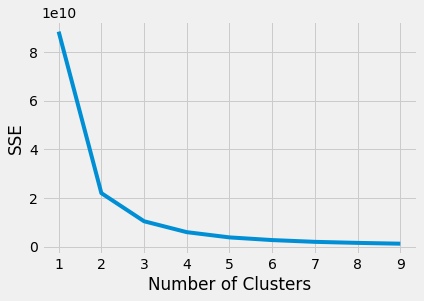

In [115]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse) 
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [116]:
kl = KneeLocator(range(1, 10), sse, 
                 curve="convex", 
                 direction="decreasing")

kl.elbow

3

### <span style=color:darkred>Cantidad de Clusters</span>

In [117]:
clustering = KMeans(n_clusters=kl.elbow,max_iter=300)
clustering.fit(df)

KMeans(n_clusters=3)

In [20]:
clustering.labels_

array([1, 1, 0, ..., 0, 0, 0])

In [119]:
df['Kmeans_Clustering']= clustering.labels_
df_scaler ['Kmeans_Clustering']= clustering.labels_
df_scaler.head()

,id,type_le,Num_venta,rarity,amount_eth,adj_close,Redimiento,Kmeans_Clustering
0,1,3,2,0.000153,0.097118,0.995205,0.011607,1
1,1,3,1,0.000541,0.177456,0.949946,0.257123,1
2,1,3,0,0.000347,0.001540,0.999999,0.000000,1
3,14,2,2,0.000231,0.026787,0.999617,0.006984,1
4,14,2,1,0.000111,0.009564,0.999901,0.010294,1


### <span style=color:darkred>Cantidad de Clusters</span>

In [120]:
pca = PCA(n_components=2)

In [121]:
pca_df = pca.fit_transform (df)

In [122]:
pca_df

array([[ 5.37476429e+03,  9.44153090e-01],
       [ 5.37476430e+03, -5.47601510e-02],
       [ 5.37476430e+03, -1.05543375e+00],
       ...,
       [-4.62123574e+03, -1.08347533e+00],
       [-4.62223575e+03, -1.27651746e-01],
       [-4.62223575e+03, -1.12740478e+00]])

In [123]:
pca_df_df = pd.DataFrame(pca_df, columns=['componente1', 'componente2'])
pca_df_df

,componente1,componente2
0,5374.764290,0.944153
1,5374.764295,-0.054760
2,5374.764301,-1.055434
3,5361.764286,0.922079
4,5361.764292,-0.077663
...,...,...
12475,-4613.235747,-1.127380
12476,-4614.235743,-1.105426
12477,-4621.235739,-1.083475
12478,-4622.235752,-0.127652


In [124]:
pca_df_df['Kmeans_Clustering']= clustering.labels_
pca_df_df

,componente1,componente2,Kmeans_Clustering
0,5374.764290,0.944153,1
1,5374.764295,-0.054760,1
2,5374.764301,-1.055434,1
3,5361.764286,0.922079,1
4,5361.764292,-0.077663,1
...,...,...,...
12475,-4613.235747,-1.127380,0
12476,-4614.235743,-1.105426,0
12477,-4621.235739,-1.083475,0
12478,-4622.235752,-0.127652,0


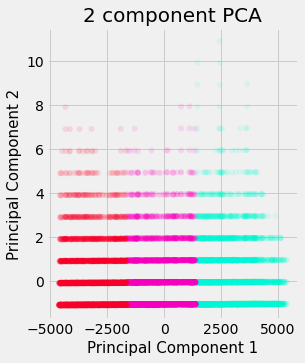

In [125]:
fig = plt.figure(figsize=(4,5))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(x = pca_df_df.componente1, y= pca_df_df.componente2,
          c = pca_df_df.Kmeans_Clustering , edgecolor='none', alpha=0.1,
           cmap=plt.cm.get_cmap('gist_rainbow', 10))

### <span style=color:darkred>Evaulació</span>

In [126]:
silhouette_score(df, clustering.labels_).round(4)

0.5805

In [129]:
dbscan = DBSCAN(eps=0.3)

dbscan.fit(X)

dbscan_silhouette = silhouette_score(X, dbscan.labels_).round (2)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
dbscan_silhouette

## <span style=color:darkblue>DataFrame  top 1000 moviments finanacers</span>

In [131]:
#df = pd.read_csv('.\\datasets_definitius\\df_finance_all.csv')
df = pd.read_csv('.\\datasets_definitius\\df_finance_top_1000.csv')

In [132]:
df = df.drop(['Unnamed: 0'], axis=1)

In [133]:
df.describe()

,id2,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth
count,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000
mean,5465.318271,0.081601,28.441569,1370.557298,1.072692,58.823278,2020.207597,4.518009,15.533726
std,2764.934910,0.048814,113.996623,957.624233,1.418131,711.876944,1.255967,2.855550,8.227516
min,89.000000,0.000525,0.010000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000
25%,3100.000000,0.056308,1.745000,341.762500,0.000000,0.000000,2020.000000,2.000000,9.000000
50%,5631.000000,0.066926,18.790000,1660.910000,1.000000,0.803354,2021.000000,4.000000,15.000000
75%,7940.000000,0.111697,35.000000,1937.450000,2.000000,2.071431,2021.000000,6.000000,22.000000
max,9997.000000,0.681778,4200.000000,4168.700000,11.000000,25195.513196,2021.000000,12.000000,31.000000


In [134]:
df

,id2,type,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth
0,89,Female,0.014377,19.99,353.362,2,1.606553,2020,9,6
1,89,Female,0.014377,20.00,219.840,1,12.701670,2020,5,28
2,89,Female,0.014377,1.50,230.774,0,0.000000,2017,7,12
3,143,Male,0.017581,165.00,1854.560,1,291.890113,2021,3,14
4,143,Male,0.017581,6.50,161.284,0,0.000000,2020,1,25
...,...,...,...,...,...,...,...,...,...,...
1522,9943,Female,0.169540,0.50,172.470,0,0.000000,2019,8,31
1523,9953,Male,0.102392,88.00,1678.650,1,0.897956,2021,3,23
1524,9953,Male,0.102392,98.00,1678.650,0,0.000000,2021,3,23
1525,9971,Female,0.062378,24.00,1781.990,0,0.000000,2021,2,22


### <span style=color:darkred>labelencoder</span>

In [135]:
labelencoder = LabelEncoder()

In [136]:
df['type_le'] = labelencoder.fit_transform(df['type'])

In [137]:
df

,id2,type,rarity,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth,type_le
0,89,Female,0.014377,19.99,353.362,2,1.606553,2020,9,6,2
1,89,Female,0.014377,20.00,219.840,1,12.701670,2020,5,28,2
2,89,Female,0.014377,1.50,230.774,0,0.000000,2017,7,12,2
3,143,Male,0.017581,165.00,1854.560,1,291.890113,2021,3,14,3
4,143,Male,0.017581,6.50,161.284,0,0.000000,2020,1,25,3
...,...,...,...,...,...,...,...,...,...,...,...
1522,9943,Female,0.169540,0.50,172.470,0,0.000000,2019,8,31,2
1523,9953,Male,0.102392,88.00,1678.650,1,0.897956,2021,3,23,3
1524,9953,Male,0.102392,98.00,1678.650,0,0.000000,2021,3,23,3
1525,9971,Female,0.062378,24.00,1781.990,0,0.000000,2021,2,22,2


### <span style=color:darkred>Normalitzar les dades</span>

In [139]:
df = df[['id2','type_le','Num_venta','rarity','amount_eth','adj_close','Redimiento']]
df

,id2,type_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,89,2,2,0.014377,19.99,353.362,1.606553
1,89,2,1,0.014377,20.00,219.840,12.701670
2,89,2,0,0.014377,1.50,230.774,0.000000
3,143,3,1,0.017581,165.00,1854.560,291.890113
4,143,3,0,0.017581,6.50,161.284,0.000000
...,...,...,...,...,...,...,...
1522,9943,2,0,0.169540,0.50,172.470,0.000000
1523,9953,3,1,0.102392,88.00,1678.650,0.897956
1524,9953,3,0,0.102392,98.00,1678.650,0.000000
1525,9971,2,0,0.062378,24.00,1781.990,0.000000


In [140]:
df_scaler = pd.DataFrame(df)

In [141]:
scalerN = Normalizer()

In [142]:
df_scaler

,id2,type_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,89,2,2,0.014377,19.99,353.362,1.606553
1,89,2,1,0.014377,20.00,219.840,12.701670
2,89,2,0,0.014377,1.50,230.774,0.000000
3,143,3,1,0.017581,165.00,1854.560,291.890113
4,143,3,0,0.017581,6.50,161.284,0.000000
...,...,...,...,...,...,...,...
1522,9943,2,0,0.169540,0.50,172.470,0.000000
1523,9953,3,1,0.102392,88.00,1678.650,0.897956
1524,9953,3,0,0.102392,98.00,1678.650,0.000000
1525,9971,2,0,0.062378,24.00,1781.990,0.000000


In [143]:
df_scaler.iloc[ : , 3: ]

,rarity,amount_eth,adj_close,Redimiento
0,0.014377,19.99,353.362,1.606553
1,0.014377,20.00,219.840,12.701670
2,0.014377,1.50,230.774,0.000000
3,0.017581,165.00,1854.560,291.890113
4,0.017581,6.50,161.284,0.000000
...,...,...,...,...
1522,0.169540,0.50,172.470,0.000000
1523,0.102392,88.00,1678.650,0.897956
1524,0.102392,98.00,1678.650,0.000000
1525,0.062378,24.00,1781.990,0.000000


In [144]:
df_scaler.iloc[ : , 3: ] = scalerN.fit_transform( df_scaler.iloc[ : , 3: ])

In [145]:
df_scaler

,id2,type_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,89,2,2,0.000041,0.056480,0.998393,0.004539
1,89,2,1,0.000065,0.090451,0.994243,0.057444
2,89,2,0,0.000062,0.006500,0.999979,0.000000
3,143,3,1,0.000009,0.087550,0.984046,0.154880
4,143,3,0,0.000109,0.040269,0.999189,0.000000
...,...,...,...,...,...,...,...
1522,9943,2,0,0.000983,0.002899,0.999995,0.000000
1523,9953,3,1,0.000061,0.052351,0.998629,0.000534
1524,9953,3,0,0.000061,0.058281,0.998300,0.000000
1525,9971,2,0,0.000035,0.013467,0.999909,0.000000


In [146]:
df_scaler.iloc[ : , 0 : 6]

,id2,type_le,Num_venta,rarity,amount_eth,adj_close
0,89,2,2,0.000041,0.056480,0.998393
1,89,2,1,0.000065,0.090451,0.994243
2,89,2,0,0.000062,0.006500,0.999979
3,143,3,1,0.000009,0.087550,0.984046
4,143,3,0,0.000109,0.040269,0.999189
...,...,...,...,...,...,...
1522,9943,2,0,0.000983,0.002899,0.999995
1523,9953,3,1,0.000061,0.052351,0.998629
1524,9953,3,0,0.000061,0.058281,0.998300
1525,9971,2,0,0.000035,0.013467,0.999909


In [147]:
X =  np.array(df_scaler.iloc[ : , 0 : 6])
y = np.array(df_scaler.iloc[ : , 6 : 7])

### <span style=color:darkred>Cantidad de Clusters</span>

In [148]:
sse = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaler)
    
    sse.append(kmeans.inertia_)

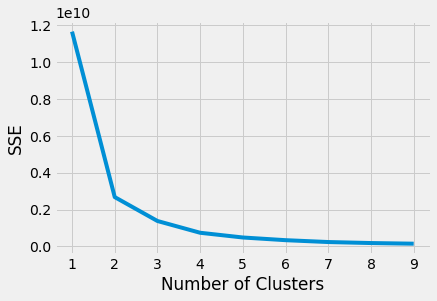

In [149]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse) 
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [150]:
kl = KneeLocator(range(1, 10), sse, 
                 curve="convex", 
                 direction="decreasing")

kl.elbow

2

### <span style=color:darkred>Cantidad de Clusters</span>

In [151]:
clustering = KMeans(n_clusters=kl.elbow,max_iter=300)
clustering.fit(df)

KMeans(n_clusters=2)

In [152]:
clustering.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [153]:
df['Kmeans_Clustering']= clustering.labels_
df_scaler ['Kmeans_Clustering']= clustering.labels_
df_scaler.head()

,id2,type_le,Num_venta,rarity,amount_eth,adj_close,Redimiento,Kmeans_Clustering
0,89,2,2,0.000041,0.056480,0.998393,0.004539,0
1,89,2,1,0.000065,0.090451,0.994243,0.057444,0
2,89,2,0,0.000062,0.006500,0.999979,0.000000,0
3,143,3,1,0.000009,0.087550,0.984046,0.154880,0
4,143,3,0,0.000109,0.040269,0.999189,0.000000,0


### <span style=color:darkred>Cantidad de Clusters</span>

In [154]:
pca = PCA(n_components=2)

In [155]:
pca_df = pca.fit_transform (df)

In [156]:
pca_df

array([[ 5.37631827e+03,  1.00274916e+00],
       [ 5.37631829e+03,  4.05318753e-03],
       [ 5.37631831e+03, -9.94876178e-01],
       ...,
       [-4.48768173e+03, -1.14366063e+00],
       [-4.50568172e+03, -1.19125444e+00],
       [-4.53168173e+03, -1.09719858e+00]])

In [157]:
pca_df_df = pd.DataFrame(pca_df, columns=['componente1', 'componente2'])
pca_df_df

,componente1,componente2
0,5376.318271,1.002749
1,5376.318291,0.004053
2,5376.318311,-0.994876
3,5322.318285,0.050613
4,5322.318305,-0.948631
...,...,...
1522,-4477.681721,-1.190718
1523,-4487.681748,-0.144827
1524,-4487.681728,-1.143661
1525,-4505.681721,-1.191254


In [158]:
pca_df_df['Kmeans_Clustering']= clustering.labels_
pca_df_df

,componente1,componente2,Kmeans_Clustering
0,5376.318271,1.002749,0
1,5376.318291,0.004053,0
2,5376.318311,-0.994876,0
3,5322.318285,0.050613,0
4,5322.318305,-0.948631,0
...,...,...,...
1522,-4477.681721,-1.190718,1
1523,-4487.681748,-0.144827,1
1524,-4487.681728,-1.143661,1
1525,-4505.681721,-1.191254,1


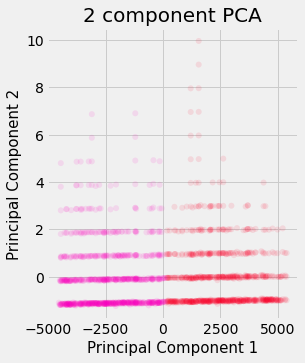

In [159]:
fig = plt.figure(figsize=(4,5))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(x = pca_df_df.componente1, y= pca_df_df.componente2,
          c = pca_df_df.Kmeans_Clustering , edgecolor='none', alpha=0.1,
           cmap=plt.cm.get_cmap('gist_rainbow', 10))

### <span style=color:darkred>Evaulació</span>

In [160]:
silhouette_score(df, clustering.labels_).round(4)

0.6532

In [161]:
dbscan = DBSCAN(eps=0.3)

dbscan.fit(X)

dbscan_silhouette = silhouette_score(X, dbscan.labels_).round (2)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
dbscan_silhouette